In [1]:
import pandas as pd
import numpy as np
import os
import random
from copy import deepcopy
import math
from itertools import product
import pickle
import joblib

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# 실험 1

In [24]:
loan_df = pd.read_csv('./data/loan_result.csv')

In [25]:
loan_df.dropna(axis=0,inplace=True)

In [26]:
loan_df.drop(['loanapply_insert_time'], axis=1, inplace=True)

In [27]:
data_set=loan_df.sample(200_000)
X,y= data_set.loc[:, data_set.columns !='is_applied'] ,data_set['is_applied']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.934575

In [28]:
f1_score(y_test,y_pred)

0.07884547694473777

In [29]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[37271,   659],
       [ 1958,   112]])

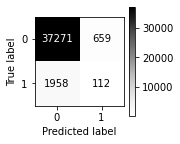

In [30]:
d=ConfusionMatrixDisplay(cm,display_labels=[0,1])
fig,ax=plt.subplots(figsize=(2,2))
d.plot(cmap='Greys',ax=ax)

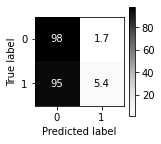

In [31]:
new_cm = np.array([cm[0]/sum(cm[0])*100, cm[1]/sum(cm[1])*100])
d=ConfusionMatrixDisplay(new_cm,display_labels=[0,1])
fig,ax=plt.subplots(figsize=(2,2))
d.plot(cmap='Greys',ax=ax)

# 실험 2

In [19]:
data_set = pd.concat([loan_df[loan_df['is_applied']==0].sample(100_000, random_state=42),
                      loan_df[loan_df['is_applied']==1].sample(100_000, random_state=42)])
X,y= data_set.loc[:, data_set.columns !='is_applied'] ,data_set['is_applied']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.654225

In [20]:
f1_score(y_test,y_pred)

0.6532454183067165

In [21]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[13141,  6852],
       [ 6979, 13028]])

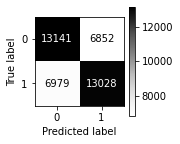

In [22]:
d=ConfusionMatrixDisplay(cm,display_labels=[0,1])
fig,ax=plt.subplots(figsize=(2,2))
d.plot(cmap='Greys',ax=ax)

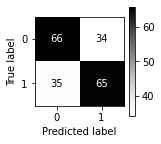

In [23]:
new_cm = np.array([cm[0]/sum(cm[0])*100, cm[1]/sum(cm[1])*100])
d=ConfusionMatrixDisplay(new_cm,display_labels=[0,1])
fig,ax=plt.subplots(figsize=(2,2))
d.plot(cmap='Greys',ax=ax)

# 실험 3

In [2]:
merged_df = pd.read_csv('./customData/merged_user_loan.csv',index_col=0)

In [3]:
merged_df.dropna(inplace=True)

In [4]:
merged_df.shape

(594841, 23)

In [5]:
data_set=merged_df.sample(10_0000)

In [7]:
X,y= data_set.loc[:, data_set.columns !='is_applied'] ,data_set['is_applied']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

ValueError: could not convert string to float: '2022-05-19 18:18:34'